In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geoviews as gv
import geoviews.feature as gf

from geoviews import opts
from cartopy import crs

gv.extension('bokeh', 'matplotlib')

metadata = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/metadata/metadata.csv")

ModuleNotFoundError: No module named 'geoviews'

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   sqft                   1636 non-null   float64
 8   lat                    1399 non-null   float64
 9   lng                    1399 non-null   float64
 10  timezone               1636 non-null   object 
 11  electricity            1578 non-null   object 
 12  hotwater               185 non-null    object 
 13  chilledwater           555 non-null    object 
 14  steam                  370 non-null    object 
 15  wate

<BarContainer object of 6 artists>

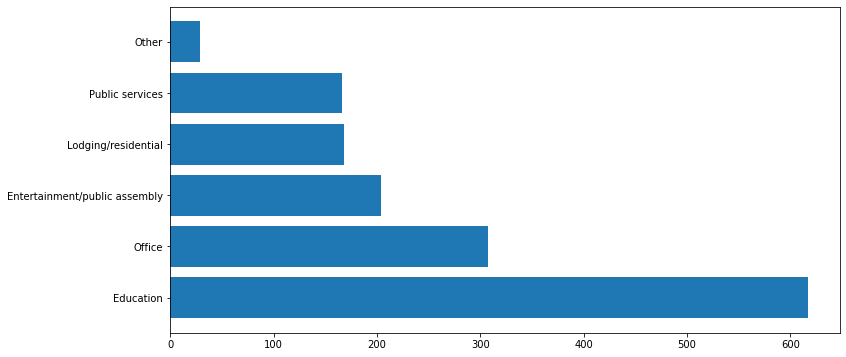

In [ ]:
md_primary_usage = pd.DataFrame(metadata["primaryspaceusage"].value_counts())
x = md_primary_usage.iloc[:6].index.values
y = md_primary_usage['primaryspaceusage'].iloc[:6].values
fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(x, y)

In [ ]:
md_education = metadata[metadata["primaryspaceusage"] == 'Education']
md_education


,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,...,2008.0,NaN,NaN,NaN,NaN,276,NaN,NaN,None,NaN
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,...,2004.0,NaN,NaN,NaN,NaN,375,NaN,NaN,None,NaN
6,Panther_education_Mattie,Panther,2.0,0.0,Education,Classroom,499.4,5376.0,28.517689,-81.379039,...,1991.0,NaN,NaN,NaN,NaN,49,NaN,NaN,None,NaN
8,Panther_education_Diann,Panther,3.0,0.0,Education,Classroom,2200.4,23685.0,28.517689,-81.379039,...,2002.0,NaN,NaN,NaN,NaN,145,NaN,NaN,None,NaN
9,Panther_education_Gina,Panther,4.0,0.0,Education,Research,10833.1,116607.0,28.517689,-81.379039,...,1975.0,NaN,NaN,NaN,NaN,546,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,Cockatoo_education_Marva,Cockatoo,1438.0,15.0,Education,College Classroom,10123.7,108971.0,42.459837,-76.485292,...,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,Cockatoo_education_Collin,Cockatoo,1439.0,15.0,Education,College Laboratory,5248.7,56497.0,42.459837,-76.485292,...,1957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621,Cockatoo_education_Gussie,Cockatoo,1441.0,15.0,Education,College Laboratory,2800.4,30143.0,42.459837,-76.485292,...,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,Cockatoo_education_Arlen,Cockatoo,1443.0,15.0,Education,College Classroom,3745.0,40311.0,42.459837,-76.485292,...,1913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


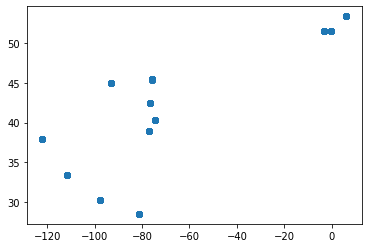

In [ ]:
plt.scatter(metadata['lng'], metadata['lat'])

In [ ]:
latitude = list(metadata['lat'].unique())
longitude = list(metadata['lng'].unique())
print(len(latitude), len(longitude))
coord = [(lat, lng) for lat, lng in zip(latitude, longitude)]
coord

16 16


[(28.5176885788321, -81.3790387999998),
 (51.51878965384613, -0.1345562307692307),
 (33.42442530000004, -111.9281403999998),
 (38.9035039800032, -77.0053494170663),
 (37.87190340000004, -122.26072860000008),
 (51.49783804108846, -3.186245571244898),
 (40.349999999999966, -74.69999999999995),
 (45.4215, -75.6972),
 (nan, nan),
 (30.26719999999989, -97.7430999999998),
 (45.3876, -75.696),
 (51.49984, -0.124663),
 (53.34979999999997, 6.2603),
 (44.97878184783975, -93.2553976421019),
 (42.45983685925793, -76.4852915864667),
 (51.52193899999999, -0.120069)]